In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/nimikaringada/Downloads/Reviews.csv')

# Remove rows with null values
df.dropna(inplace=True)

# Display the first few rows of the cleaned DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...


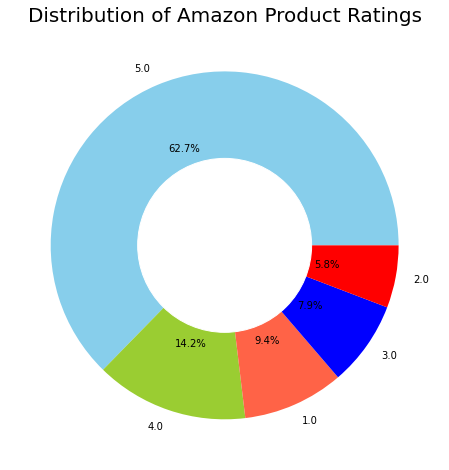

5.0    3134
4.0     711
1.0     470
3.0     395
2.0     290
Name: Score, dtype: int64

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the ratings from the 'Score' column
ratings = df['Score'].value_counts()

# Create variables for the pie chart
numbers = ratings.index
quantity = ratings.values

# Define custom colors for the pie chart
custom_colors = ["skyblue", "yellowgreen", "tomato", "blue", "red"]

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors, autopct='%1.1f%%')

# Add a central circle to make it a donut chart
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

# Customize the appearance
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

# Return the value counts for inspection
ratings

In [5]:
# Uncommented the below code and run once. After the code is excecuted, please commented the below code
# import nltk
# nltk.download('vader_lexicon')
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nimikaringada/nltk_data...


True

In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
sentiments = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    scores = sentiments.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu']

# Apply the function to the Text column and create new columns
df[['Positive', 'Negative', 'Neutral']] = df['Text'].apply(lambda x: pd.Series(get_sentiment_scores(x)))

# Display the updated DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positive,Negative,Neutral
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.305,0.000,0.695
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000,0.138,0.862
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.155,0.091,0.754
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,0.000,1.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.448,0.000,0.552


In [7]:
# Calculate the sum of each sentiment column
x = df['Positive'].sum()
y = df['Negative'].sum()
z = df['Neutral'].sum()

# Determine the overall sentiment based on the greatest sum
if x > y and x > z:
    sentiment = 'Positive'
elif y > x and y > z:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

# Return the overall sentiment
sentiment

'Neutral'